<a href="https://colab.research.google.com/github/gkdivya/EVA_Public/blob/master/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-09-04 13:01:43.642570


In [36]:
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Add, Input
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-09-04 13:29:08.899544


### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 2s 0us/step
2019-09-04 13:01:46.298533


(60000, 28, 28)
2019-09-04 13:01:46.328553


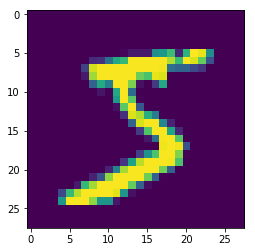

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-09-04 13:01:46.503920


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-09-04 13:01:46.662473


In [8]:
y_train[:10]
print(datetime.datetime.now())

2019-09-04 13:01:46.669957


In [9]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-09-04 13:01:46.684414


In [10]:
Y_train[:10]
print(datetime.datetime.now())

2019-09-04 13:01:46.690067


Below MAIN block is redesigned as functional API

```
# Sequential Code

from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

print(datetime.datetime.now())

```



### Redesign the above block as follows:

*   x1 = Input
*   x2 = Conv(x1)
*   x3 = Conv(x1 + x2)
*   x4 = MaxPooling(x1 + x2 + x3)
*   x5 = Conv(x4)
*   x6 = Conv(x4 + x5)
*   x7 = Conv(x4 + x5 + x6)
*   x8 = MaxPooling(x5 + x6 + x7)
*   x9 = Conv(x8)
*   x10 = Conv (x8 + x9)
*   x11 = Conv (x8 + x9 + x10)


*   BIG KERNEL Operation (use a large kernel size (10 units), if required at this step to be able to add softmax in the next layer)
SoftMax

In [0]:
## Functional DNN

#Redefine the network with dropout and more channels

x1 = Input(shape=(28,28,1), name='ImageInput')

x2 = Conv2D(32, (3,3), activation='relu', padding='same', name='x2')(x1)
x2 = BatchNormalization()(x2)
x2 = Dropout(rate=0.1)(x2)

x3 = Conv2D(32, (3,3), activation='relu', padding='same', name='x3')(keras.layers.add([x1, x2])) 
x3 = BatchNormalization()(x3)

x4 = MaxPooling2D((2,2), name='x4')(keras.layers.add([x1, x2, x3])) 
x5 = Conv2D(32, (3,3), activation='relu', padding='same', name='x5')(x4)
x5 = BatchNormalization()(x5)

x6 = Conv2D(32, (3,3), activation='relu', padding='same', name='x6')(keras.layers.add([x4, x5])) 
x6 = BatchNormalization()(x6)

x7 = Conv2D(32, (3,3), activation='relu', padding='same', name='x7')(keras.layers.add([x4, x5, x6])) 
x7 = BatchNormalization()(x7)

x8 = MaxPooling2D((2,2), name='x8')(keras.layers.add([x5, x6, x7])) 
x9 = Conv2D(32, (3,3), activation='relu', padding='same', name='x9')(x8)
x9 = BatchNormalization()(x9)


x10 = Conv2D(32, (3,3), activation='relu', padding='same', name='x10')(keras.layers.add([x8, x9])) 
x10 = BatchNormalization()(x10)

x11 = Conv2D(32, (3,3), activation='relu', padding='same', name='x11')(keras.layers.add([x8, x9, x10])) 
x11 = BatchNormalization()(x11)

x = Convolution2D(10, (7, 7))(x11)
flat = Flatten()(x)
predictions = Activation('softmax')(flat)
model = Model(inputs=x1, outputs=predictions)

In [44]:
model.summary()

print(datetime.datetime.now())

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ImageInput (InputLayer)         (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
x2 (Conv2D)                     (None, 28, 28, 32)   320         ImageInput[0][0]                 
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 28, 28, 32)   128         x2[0][0]                         
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 28, 28, 32)   0           batch_normalization_9[0][0]      
____________________________________________________________________________________________

In [45]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-09-04 13:37:13.465317


In [46]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 25s 419us/step - loss: 0.0973 - acc: 0.9693
Epoch 2/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.0420 - acc: 0.9870
Epoch 3/10
60000/60000 [==============================] - 23s 382us/step - loss: 0.0314 - acc: 0.9900
Epoch 4/10
60000/60000 [==============================] - 23s 382us/step - loss: 0.0240 - acc: 0.9922
Epoch 5/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.0189 - acc: 0.9939
Epoch 6/10
60000/60000 [==============================] - 23s 391us/step - loss: 0.0163 - acc: 0.9947
Epoch 7/10
60000/60000 [==============================] - 23s 382us/step - loss: 0.0136 - acc: 0.9958
Epoch 8/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.0111 - acc: 0.9965
Epoch 9/10
60000/60000 [==============================] - 23s 382us/step - loss: 0.0100 - acc: 0.9968
Epoch 10/10
60000/60000 [==============================] - 23s 379us/step - loss: 

In [47]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-09-04 13:41:08.195473


In [48]:
print(score)
print(datetime.datetime.now())

[0.025728362757801097, 0.9938]
2019-09-04 13:41:08.202794
